# Практическая работа №3: Статистический анализ социальных сетей
Выполнил студент гр. 0383 Черепанов Роман. Вариант №69

# Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

# Основные теоретические положения

**Диада** — элемент сети, представляющий собой пару акторов и (возможную) связь между ними: $D_{ij}=(X_{ij}, X_{ji}), i\neq j$.

**Цензус диад** — тройка чисел $<M, A, N>$, где:

$M = \sum_{i<j} X_{ij} X_{ji}$,

$A = X_{++} - 2M$,

$N = C^2_g - A - M$.

**Индекс взаимности Каца-Пауэлла** — характеристика измерения тенденции акторов в группе. Данный индекс оценивает тенденцию акторов в группе к взаимному выбору друг друга. 

Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом.

Для фиксированного выбора из $d$ акторов:
*  $P(i \rightarrow j \wedge j \rightarrow i) = \frac{d}{g - 1}\left( \frac{d}{g - 1} + \rho_{KP} \frac{g - 1 - d}{g - 1} \right).$
*  $\hat{\rho}_{KP} = \frac{2(g-1)M - gd^2}{gd(g - d - 1)}$.



Для свободного выбора:
* $P = \frac{x_{i+}x_{j+}}{(g - 1)^2}.$
* $\hat{\rho}_{kp} = \frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 - L_2}$.



**Индекс взаимности Бандиопадхьяйя** — индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \frac{M - M_{\min}}{M_{\max} - M_{\min}},$

* $M_{\min} = \max f(t), 0 \leq t \leq g$, 

* $M_{\max} = \lfloor \frac{1}{2} \sum^g_{i = 1} x_{i+} - \max g(t)\rfloor, 0 \leqslant t \leqslant g,$

* $f(t) = \sum^t_{i=1} x_{i+} - t(g - 1) - C^2_g,$

* $g(t) = \sum^t_{i=1} x_{i+} - t(t - 1) - \sum^g_{i=t+1} \min (t, x_{i+}).$

**Вычисление доверительного интервала для оценки P.**

$\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}.$


$\hat{P} \in [\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}; \hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}],$

$z_{\alpha/2}: \Phi(z_{\alpha/2}) = 0.5 - \frac{\alpha}{2}$, где $\alpha - $ некоторый уровень значимости, $(1 - \alpha) - $ доверительная надёжность. 

# Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

# Выполнение работы

In [1]:
install.packages('igraph')
install.packages('statnet')
library(igraph)
library(statnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘robustbase’, ‘coda’, ‘trust’, ‘lpSolveAPI’, ‘rle’, ‘tergm’, ‘ergm.count’, ‘sna’, ‘tsna’, ‘ergm’, ‘network’, ‘networkDynamic’, ‘statnet.common’



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: tergm

Loading required package: ergm

Loading required package: network


‘network’ 1.18.0 (2022-10-05), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information



Attaching package: ‘network’


The following objects are masked from ‘package:igraph’:

    %c%, %s%, add.edges, add.vertices, de

## Задание 1.
С помощью библиотеки igraph смоделировать случайный орграф $\mathscr{G}_d$ на основе модели Эрдеша-Реньи: $\mathscr{G}_d = \mathscr{G}_d(g, p)$, где $g$ - количество акторов, $p$ - вероятность появления дуги между акторами.

In [2]:
g <- 57
p <- 0.52
graph <- erdos.renyi.game(g, p, "gnp", directed = T)

В модели $\mathscr{G}(g, p)$, граф строится путем случайного добавления рёбер. Каждое ребро включается в граф с вероятностью p независимо от остальных рёбер. Таким образом, графы с $n$ узлами и $M$ рёбрами имеют одинаковую вероятность появления $p^M (1-p)^{C^2_n - M}$.

По мере роста параметра $p$ от 0 к 1 модель включает с большей вероятностью графы с большим числом ребер.

## Задание 2.
Отобразим полученный граф.

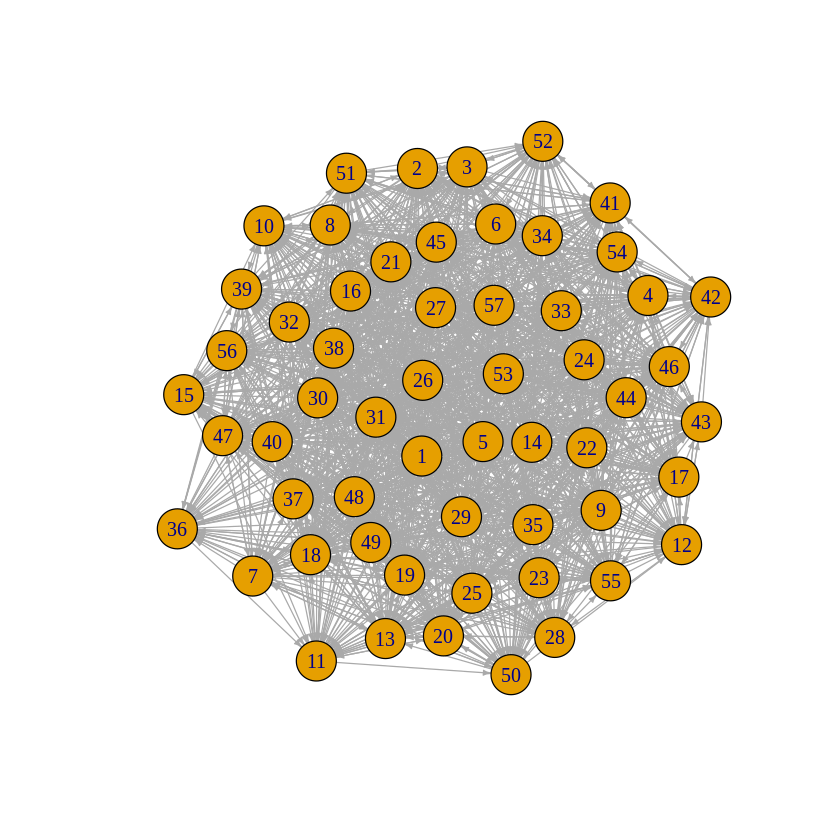

In [3]:
plot(graph, edge.arrow.size = 0.3)

Общее количество ребер достаточно велико, что влияет на изображение графа: оно получается довольно заполненным.

## Задание 3.
Вычислим пятичисловую сводку Тьюки для сети.

In [4]:
vcount(graph)

graph.density(graph)

igraph::components(graph)$no

diameter(graph)

transitivity(graph)

[1] 57

[1] 0.5184837

[1] 1

[1] 2

[1] 0.7757741

Очевидным образом, размер графа равен заданному $g$.

Достаточно большое значение параметра $p$ обеспечивает связность графа и высокую транзитивность, малый диаметр. Плотность почти совпадает с заданным $p$.

## Задание 4.
Вычислим цензус диад для данной модели. 

In [5]:
census <- dyad_census(graph)
census

$mut
[1] 416

$asym
[1] 823

$null
[1] 357

Таким образом:

* $M = 416$ — число взаимных диад;

* $A = 823$ — число однонаправленных диад;

* $N = 357$ — число нулевых диад.

Число однонаправленных диад превышает число нулевых и взаимных диад в сумме. Вероятно, значение индекса будет отрицательным.

## Задание 5.
Вычислим оценку индекса взаимности Каца-Пауэла при фиксированом количестве выборов 𝑑.

Положим $d = \lfloor g*p+0.5 \rfloor$. Каждый актор делает выбор из $(g - 1) = 56$ акторов.

In [6]:
d <- round(g*p)
d
M <- census$mut
kp_fixed <- (2*(g-1)*M - g * d^2)/(g*d*(g - 1 - d))
kp_fixed

[1] 30

[1] -0.1058929

Действительно, если считать, что каждый актор выбирает 30 из 56 акторов, то многие связи оказываются невзаимными, что выражается в отрицательном значении индекса Каца-Пауэлла.

Вычислим оценку при свободном выборе.

In [7]:
adj_matrix <- as.matrix(as_adjacency_matrix(graph))
L <- sum(rowSums(adj_matrix))
L2 <- sum(rowSums(adj_matrix)^2)

kp_free <- (2*(g - 1)^2 * M - L^2 + L2)/(L*(g - 1)^2 - L^2 + L2)
kp_free

[1] -0.03251327

Для свободного выбора значение индекса больше, но все еще отрицательно.

## Задание 6.
Вычислим вероятность того, что связь будет взаимной для каждого случая.

In [8]:
P_fix <- (d / (g-1)) * ((d/(g-1)) + kp_fixed*(g - 1 - d) / (g - 1))
P_fix

[1] 0.2606516

In [9]:
P_free <- (rowSums(adj_matrix) * colSums(adj_matrix))/(g - 1)^2
mean(P_free)

[1] 0.2693173

Вероятность взаимной связи составляет примерно 0.26 в обоих случаях, что достаточно невелико.

## Задание 7.
Вычислим индекс взаимности Бандиопадхьяйя.

In [10]:
g_func <- function(t) {
    return (sum(rowSums(adj_matrix)[1:t] - t*(t-1)) - sum(min(t, rowSums(adj_matrix)[t+1:g], na.rm = TRUE)))
}

f_func <- function(t) {
  return(sum(rowSums(adj_matrix)[1:t]) - t*(g-1) - choose(t, 2))
}


f_t <- c(0:g)
g_t <- c(0:g)
for (t in c(0:g))
  f_t[t+1] <- f_func(t)
for (t in c(0:g))
  g_t[t+1] <- g_func(t)


M_min <- max(f_t)
M_max <- floor(1/2*sum(rowSums(adj_matrix))-max(g_t))



(M - M_min)/(M_max - M_min)



[1] 0.5290055

Значение данного индекса выше, чем значение индекса Каца-Пауэлла.

## Задание 8.
Проверим нулевую гипотезу о том, что число дуг $L$ в орграфе $\mathscr{G}_d$ имеет биномиальное распределение $L ∼ Bin(g(g − 1), \frac{1}{2})$ при уровне значимости $\alpha = 0.01$. Определим максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

In [11]:
alpha <- 0.01
l <- sum(adj_matrix)
binom.test(l, g*(g-1), p = 0.5)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 1655, number of trials = 3192, p-value = 0.03835
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.5009832 0.5359503
sample estimates:
probability of success 
             0.5184837 


p-value больше $\alpha$. Значит, нулевая гипотеза выполняется, и вероятность построения ребра между любыми двумя акторами может составлять $0.5$. p-value является максимальным уровнем значимости, при котором гипотеза не отвергается. В данном случае этот уровень значимости составляет $0.02193$.

Такое значение обясняется тем, что используемый параметр $p$ достаточно близок к 0.5. 

## Задание 9.
Проверим нулевую гипотезу о том, что число дуг $L$ в орграфе $\mathscr{G}_d$ имеет биномиальное распределение $L ∼ Bin(g(g−1), 𝑃_0), P_0 = 0.55$ при уровне значимости $\alpha = 0.01$. Определим максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

In [12]:
binom.test(l, g*(g-1), p = 0.55)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 1655, number of trials = 3192, p-value =
0.0003724
alternative hypothesis: true probability of success is not equal to 0.55
95 percent confidence interval:
 0.5009832 0.5359503
sample estimates:
probability of success 
             0.5184837 


Видим, что $\alpha > $ p-value. Значит, нулевая гипотеза не выполняется.

## Задание 10.
Построим доверительный интервал для оценки параметра $\hat{p}$ с доверительной надёжностью $(1 - \alpha)$.

In [13]:
p_hat <- (sum(adj_matrix))/(g*(g-1))
p_hat

[1] 0.5184837

Из таблицы значений функции Лапласа, $z_{\alpha/2} \approx 2.34$.

In [15]:
z_a <- 2.34
interval <- z_a * sqrt((p_hat * (1 - p_hat))/(g * (g - 1)))
p_hat - interval
p_hat + interval

[1] 0.4977891

[1] 0.5391783

Получаем доверительный интервал $0.50 \leq p \leqslant 0.54$. Зная, что $p = 0.52$, можно сказать, что истинное значение входит в найденный доверительный интервал с уровнем значимости $(1 - \alpha)$.

## Выводы

В рамках данной работы был случайно сгенерирован граф с 57 вершинами и случайным набором ребер, где каждое ребро появляется с вероятностью 0.52.

Данный граф был исследован на тендеции к образованию взаимных связей, и оказалось, что при таком значении вероятности появления ребра большинство связей оказываются невзаимными.

По итоговому графу оценено изначальное значение параметра $p$, и истинное значение вошло в найденный доверительный интервал. 